In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
data = pd.read_csv('input.csv')
forecast_dict = {}
all_forecasts = pd.DataFrame()

warnings.filterwarnings("ignore")
error_metrics = {}

<Axes: >

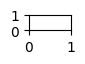

In [ ]:
plt.subplot(20,10,10)

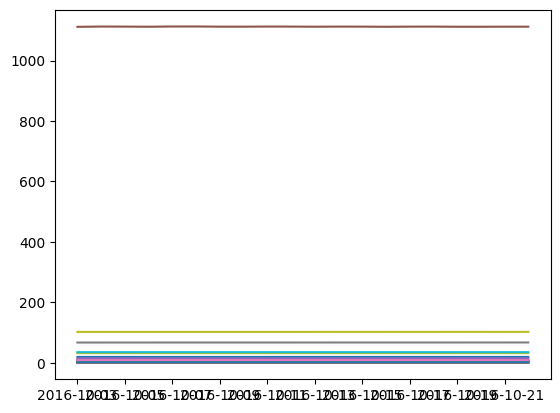

In [ ]:
for currency in data.columns[1:]:
    df_currency = data[['Date', currency]].copy()
    df_currency['Date'] = pd.to_datetime(df_currency['Date'])
    df_currency.set_index('Date', inplace=True)
    df_currency = df_currency.asfreq('D')

    train_data = df_currency[:-20]
    test_data = df_currency[-20:]

    model = SARIMAX(train_data, order=(4, 1, 3), seasonal_order=(2, 1, 1, 5))
    model_fit = model.fit()

    forecast_steps = 20
    forecast = model_fit.forecast(steps=forecast_steps)
    forecast_dates = pd.date_range(start='2016-10-03', periods=forecast_steps, freq='D')
    forecast_df = pd.DataFrame({'Date': forecast_dates, currency: forecast})
    plt.plot(forecast_dates,forecast)
    forecast_dict[currency] = forecast_df

    if all_forecasts.empty:
        all_forecasts = forecast_df
    else:
        all_forecasts = all_forecasts.merge(forecast_df, on='Date')
    if len(test_data) >= forecast_steps:
        test_data = test_data.head(forecast_steps)  # Убедиться, что тестовые данные такой же длины, как прогноз
        mape = mean_absolute_percentage_error(test_data[currency], forecast)
        error_metrics[currency] = {'MAPE': mape}
    else:
        print(f"Not enough test data for {currency} to calculate MAPE.")

In [ ]:
for currency, metrics in error_metrics.items():
    print(f"{currency} - MAPE: {metrics['MAPE'] * 100:.2f}%")

Australia - MAPE: 1.38%
Brazil - MAPE: 0.69%
Canada - MAPE: 0.56%
China - MAPE: 0.21%
Denmark - MAPE: 0.32%
Euro - MAPE: 0.26%
Hong Kong - MAPE: 0.04%
India - MAPE: 0.36%
Japan - MAPE: 0.79%
Malaysia - MAPE: 1.37%
Mexico - MAPE: 2.55%
New Zealand - MAPE: 0.84%
Norway - MAPE: 1.46%
Singapore - MAPE: 0.37%
South Africa - MAPE: 3.80%
South Korea - MAPE: 1.00%
Sweden - MAPE: 0.61%
Switzerland - MAPE: 0.40%
Taiwan - MAPE: 0.81%
Thailand - MAPE: 0.55%
United Kingdom - MAPE: 1.59%


In [ ]:
output_file_path = 'output.csv'
all_forecasts.to_csv(output_file_path, index=False)